Our graph features are designed to quantify specific transaction patterns. Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. Coins at this final address can then be sold and converted to fiat currency. Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address. Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount (what percent of these transactionsâ€™ output?) of transactions. Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

White Bitcoin addresses are capped at 1K per day (Bitcoin has 800K addresses daily).

Note that although we are certain about ransomware labels, we do not know if all white addresses are in fact not related to ransomware.

When compared to non-ransomware addresses, ransomware addresses exhibit more profound right skewness in distributions of feature values.


Data info
1. address [String]:
Stores the address of the bitcoin transaction’s recipient.

2. year [int] :
Indicates the year in which the transaction has been done.

3. day [int] :
Indicates day of the year.

4. length [int] :
Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

5. weight [float] :
Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address.

6. count [int] :
Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount of transaction.

7. looped [int] :
Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. Coins at this final address can then be sold and converted to fiat currency.

8. neighbors [int] :
Indicates the number of neighbors a transcation had.

9. income [int] :
Income in terms of Satoshi amount where a Satoshi is the smallest unit of a bitcoin, equivalent to 100 millionth of a bitcoin.


In [25]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import imblearn
import sklearn

In [2]:
parquet_file = 'https://github.com/amitsingh2409/DA231o-Detecting-Suspicious-Cryptocurrency-Transactions/raw/refs/heads/main/data/bitcoin.pq'
df = pd.read_parquet(parquet_file, engine='auto')


In [3]:
df.info(10)
df.head(10)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [4]:
# Add 'fraud' column: True if label is not 'white', False otherwise
df['fraud'] = df['label'].apply(lambda x: False if x == 'white' else True)

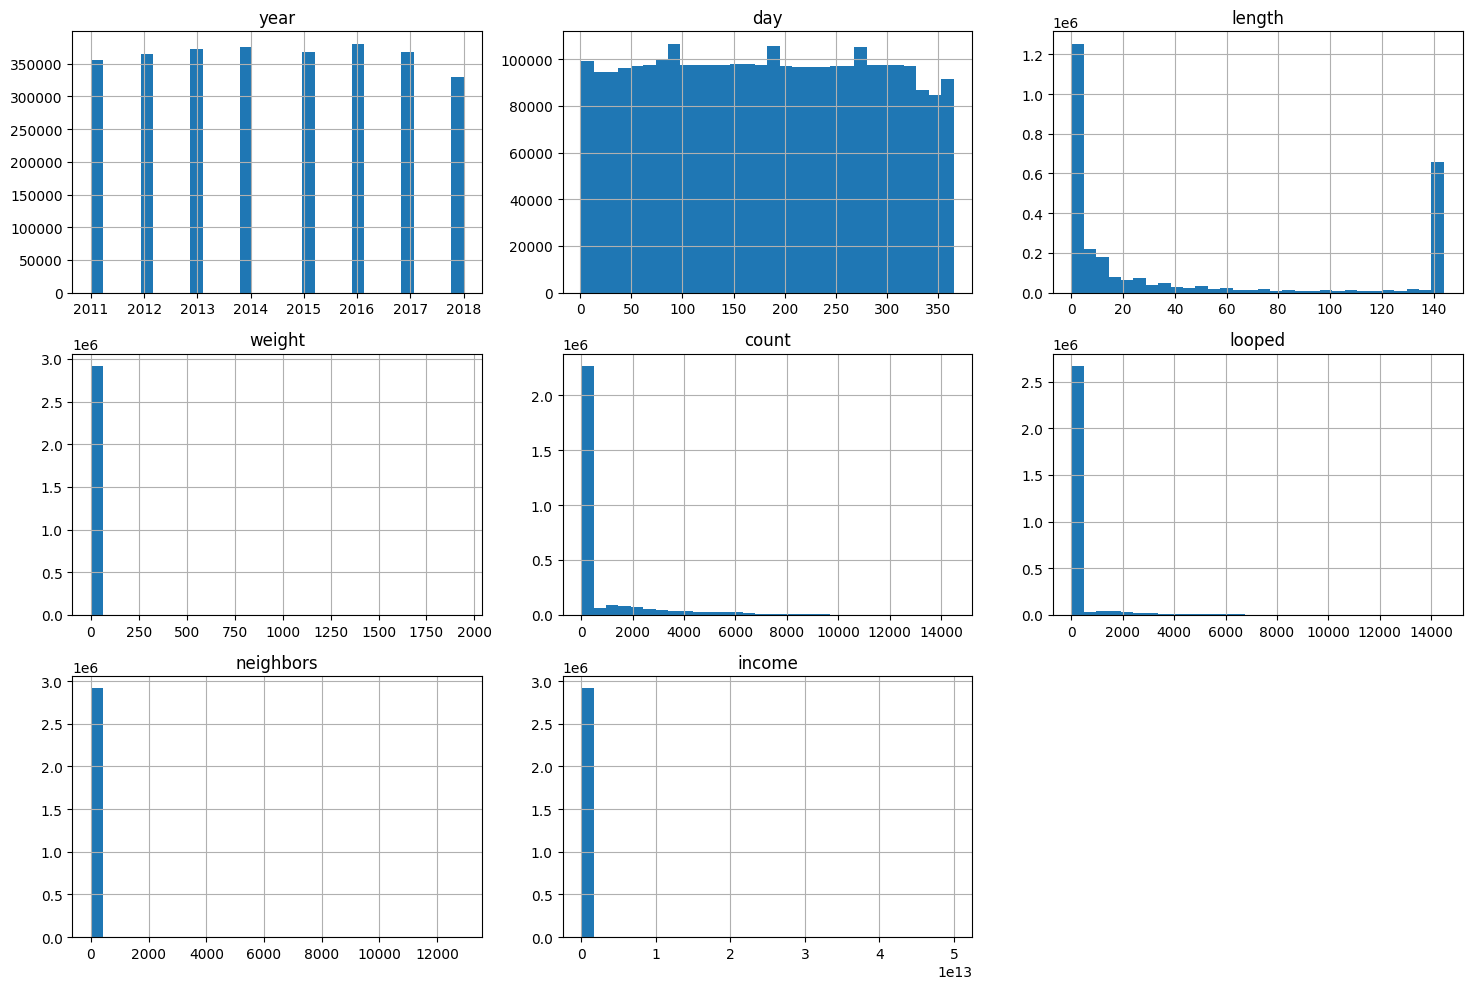

In [5]:
# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

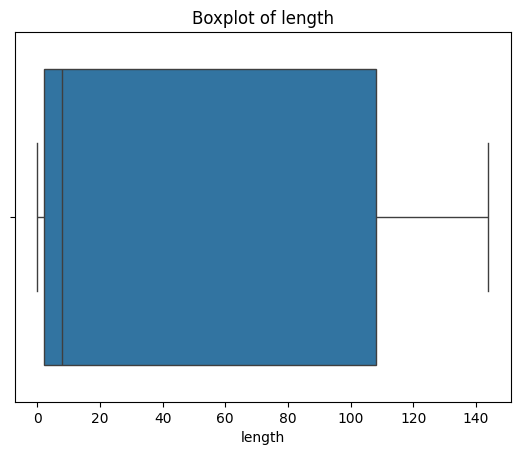

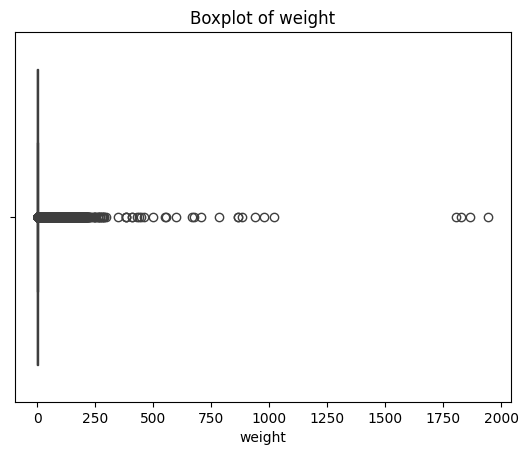

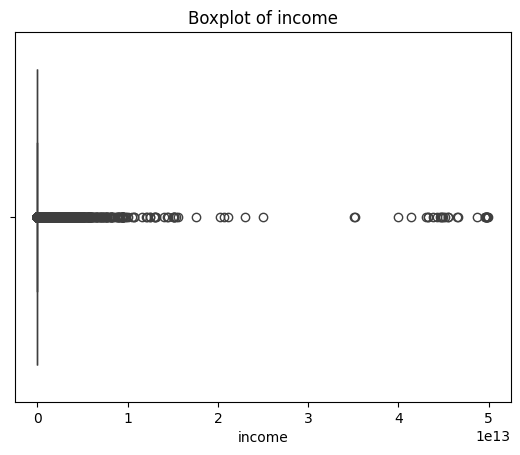

In [6]:

# Boxplots
for col in ['length', 'weight', 'income']:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

fraud
False    2875284
True       41413
Name: count, dtype: int64


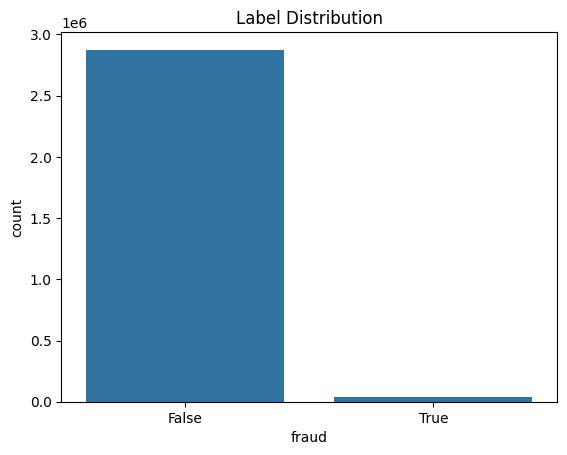

In [7]:
# Distribution of labels
print(df['fraud'].value_counts())
sns.countplot(data=df, x='fraud')
plt.title('Label Distribution')
plt.show()


In [8]:
# Drop unnecessary columns
df.drop(columns=['address','label'], inplace=True)


In [9]:
# # Label encoding for 'label'
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['label_encoded'] = le.fit_transform(df['label'])
# print(le.classes_)  # To see the mapping

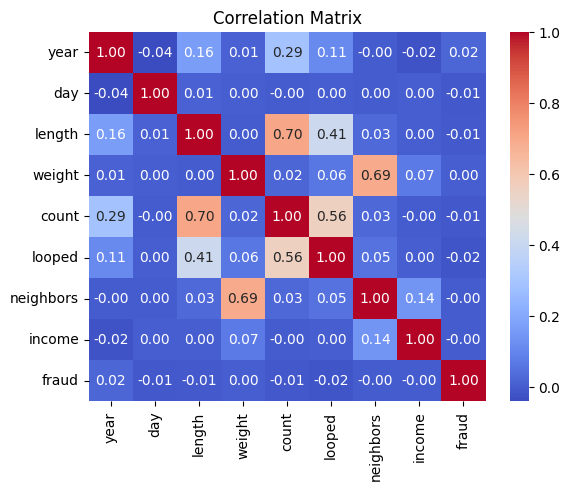

In [10]:
X = df # .drop(columns=['label', 'label_encoded'])

# Compute and visualize correlation
correlation = X.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

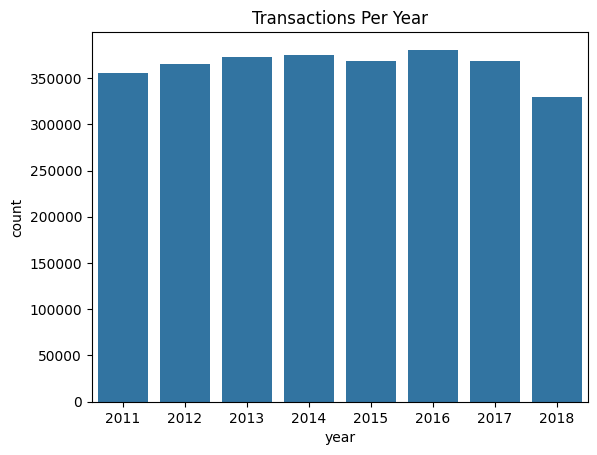

In [11]:
# Transactions by year
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
plt.title('Transactions Per Year')
plt.show()

In [12]:
# Mean income and count by fraud
grouped = df.groupby('fraud').agg({'income': 'mean', 'count': 'mean'})
print(grouped)

             income       count
fraud                          
False  4.517914e+09  723.399435
True   7.833721e+08  599.810277


In [13]:
# Identify outliers using z-scores
from scipy.stats import zscore

df['z_income'] = zscore(df['income'])
outliers = df[df['z_income'].abs() > 3]
print(outliers)

         year  day  length      weight  count  looped  neighbors  \
23630    2013  275     144  498.288526   3164    2597         64   
42636    2011    3       2   11.000000     12       0         11   
43507    2011    5       0    3.000000      3       0          3   
45219    2011    8       0    1.000000      1       0          1   
46377    2011   10      12    3.281250      7       6          4   
...       ...  ...     ...         ...    ...     ...        ...   
2904128  2018  318       2    2.000000      1       1        469   
2905141  2018  319       2    0.250000      1       0          1   
2909796  2018  324     144   61.311955  12234   12234        930   
2910594  2018  324     144   29.780284  12231   12231          4   
2914172  2018  328     144  555.178163   6034    6034        263   

               income  fraud   z_income  
23630    2.595000e+12   True  15.923535  
42636    8.415040e+11  False   5.145123  
43507    1.000000e+12  False   6.119368  
45219    6.6353

In [14]:
from imblearn.over_sampling import SMOTE

# Count the number of samples per class
class_counts = df['fraud'].value_counts()
print(class_counts)

X = df.drop(columns=['fraud'])
y = df['fraud']

# Initialize SMOTE with k_neighbors set appropriately
smote = SMOTE(k_neighbors=min(class_counts.min() - 1, 5), random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

fraud
False    2875284
True       41413
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [21]:
y_resampled.describe()
# y_resampled.describe()

count     5750568
unique          2
top          True
freq      2875284
Name: fraud, dtype: object

In [22]:
# Group by fraud status
fraud_stats = df.groupby('fraud').agg({
    'income': ['mean', 'median', 'std'],
    'weight': ['mean', 'median', 'std'],
    'length': ['mean', 'median', 'std']
})
print(fraud_stats)

             income                               weight                      \
               mean       median           std      mean    median       std   
fraud                                                                          
False  4.517914e+09  200000000.0  1.638439e+11  0.544339  0.250000  3.686734   
True   7.833721e+08  125000000.0  1.423362e+10  0.627453  0.388044  2.667625   

          length                    
            mean median        std  
fraud                               
False  45.057155    8.0  58.988706  
True   41.636926    6.0  58.442350  


/var/folders/qf/34009gfn0dgds8497j9vbpb40000gn/T/ipykernel_82760/294368686.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == False], x=col, label='Non-Fraud', shade=True)
/var/folders/qf/34009gfn0dgds8497j9vbpb40000gn/T/ipykernel_82760/294368686.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == True], x=col, label='Fraud', shade=True)


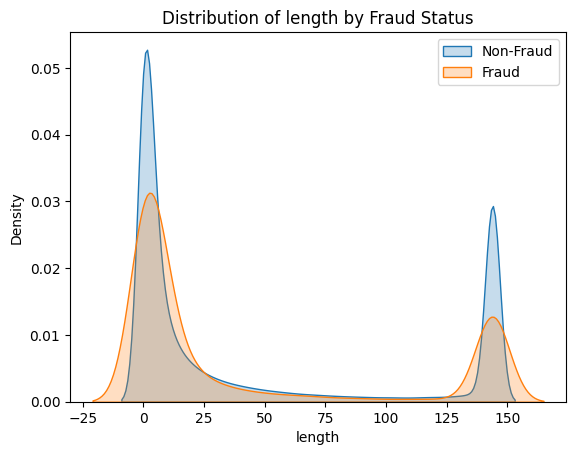

/var/folders/qf/34009gfn0dgds8497j9vbpb40000gn/T/ipykernel_82760/294368686.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == False], x=col, label='Non-Fraud', shade=True)
/var/folders/qf/34009gfn0dgds8497j9vbpb40000gn/T/ipykernel_82760/294368686.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == True], x=col, label='Fraud', shade=True)


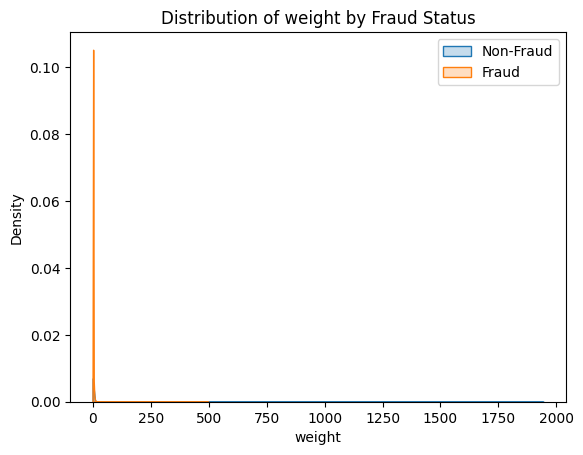

/var/folders/qf/34009gfn0dgds8497j9vbpb40000gn/T/ipykernel_82760/294368686.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == False], x=col, label='Non-Fraud', shade=True)
/var/folders/qf/34009gfn0dgds8497j9vbpb40000gn/T/ipykernel_82760/294368686.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fraud'] == True], x=col, label='Fraud', shade=True)


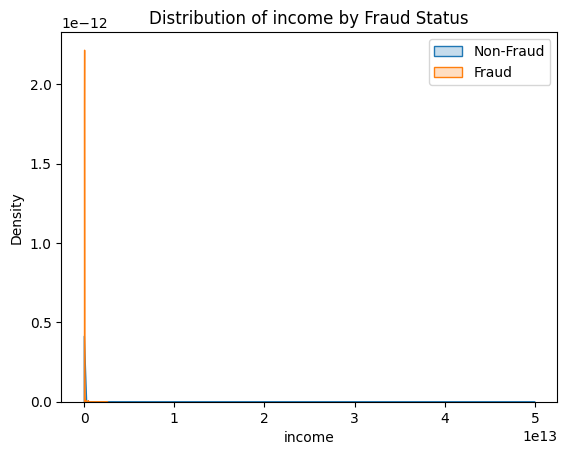

In [27]:
# Plot distributions for fraud and non-fraud classes
for col in ['length', 'weight', 'income']:
    sns.kdeplot(data=df[df['fraud'] == False], x=col, label='Non-Fraud', shade=True)
    sns.kdeplot(data=df[df['fraud'] == True], x=col, label='Fraud', shade=True)
    plt.title(f'Distribution of {col} by Fraud Status')
    plt.legend()
    plt.show()